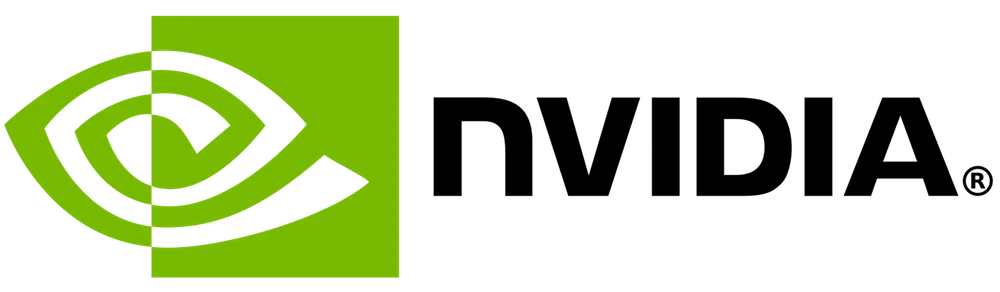

**Doggy door**

Though it is often necessary to have a large, well annotated dataset to solve a deep learning challenge, there are many  freely available pre-trained models that we can use right out of the box. As you decide to take on your own deep learning project, it is a great idea to start by looking for existing models online that can help you achieve your goal. A great place to explore available models is [NGC](https://ngc.nvidia.com/catalog/models). There are also many models hosted on GitHub that you can find through searching on Google.

**Objectives**



1.   Use TorchVision to load a very well-trained pretrained model
2.   Preprocess our own images to work with the pretrained model
3.   Use the pretrained model to perform accurate inference on your own images



**🐶🐱** **Project** **Objective**

*    Create an automatic door that:
*     ✅ Opens the door if a dog is detected.

*     ❌ Keeps the door closed if it's a cat or other animal.

**An** **Automated** **Doggy** **Door**

In this section, we will be creating a doggy door that only lets dogs (and not other animals) in and out. We can keep our cats inside, and other animals outside where they belong. Using the techniques covered so far, we would need a very large dataset with pictures of many dogs, as well as other animals. Luckily, there is a readily available model that has been trained on a massive dataset, including lots of animals.

The [ImageNet challenge](https://en.wikipedia.org/wiki/ImageNet#History_of_the_ImageNet_challenge) has produced many state-of-the-art models that can be used for image classification. They are trained on millions of images, and can accurately classify images into 1000 different categories. Many of those categories are animals, including breeds of dogs and cats. This is a perfect model for our doggy door.

**Problem**

You want to recognize animals from an image (probably from a camera attached to the door).

This problem falls under the category of image classification: predicting the class of an object in an image.

**Solution : Using a pre-trained model on ImageNet**

Plutôt que d’entraîner ton propre modèle (ce qui nécessiterait des milliers d’images, beaucoup de temps, et des ressources GPU), tu utilises un modèle pré-entraîné sur ImageNet :

ImageNet est une énorme base de données d’images (1 000 classes, +1 million d’images).
Rather than training your own model (which would require thousands of images, a lot of time, and GPU resources), you use a model pre-trained on ImageNet:

ImageNet is a huge image database (1,000 classes, over 1 million images).

It contains many breeds of dogs and cats.

Models trained on it are capable of very accurate object recognition.

It contains many breeds of dogs and cats.

Models trained on it are capable of very accurate object recognition.

💡 Examples of models available via torchvision.models:

*   resnet50

*   alexnet

*   vgg16

*   mobilenet_v2

**Advantages of the ImageNet** **model**

*    No need to retrain the model.

*    Accurate for common animals (beagles, Labradors, Persians, etc.).

*    Compatible with PyTorch: easy to integrate.

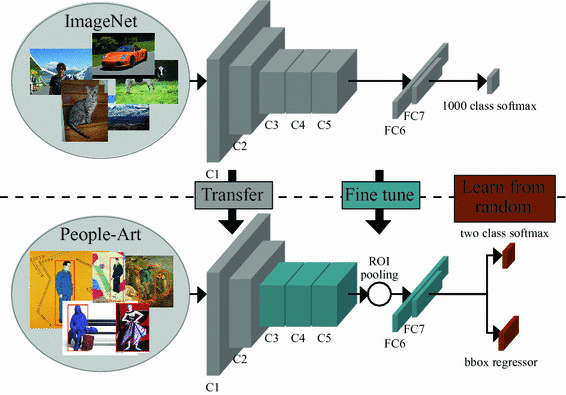

**Import** **Libraries**

In [1]:
import torch
import torchvision.transforms.v2 as transforms
import torchvision.io as tv_io

import json

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

**Loading the Model**

We will start by downloading the model. Trained ImageNet models are available to download directly within the TorchVision library. We can see the available models and their details [here](https://pytorch.org/vision/stable/models.html). Any of these models would work for our exercise. We will pick a commonly used one called [VGG16](https://pytorch.org/vision/stable/models/vgg.html) and use the [default weights](https://pytorch.org/vision/stable/models/generated/torchvision.models.vgg19.html#torchvision.models.VGG19_Weights).

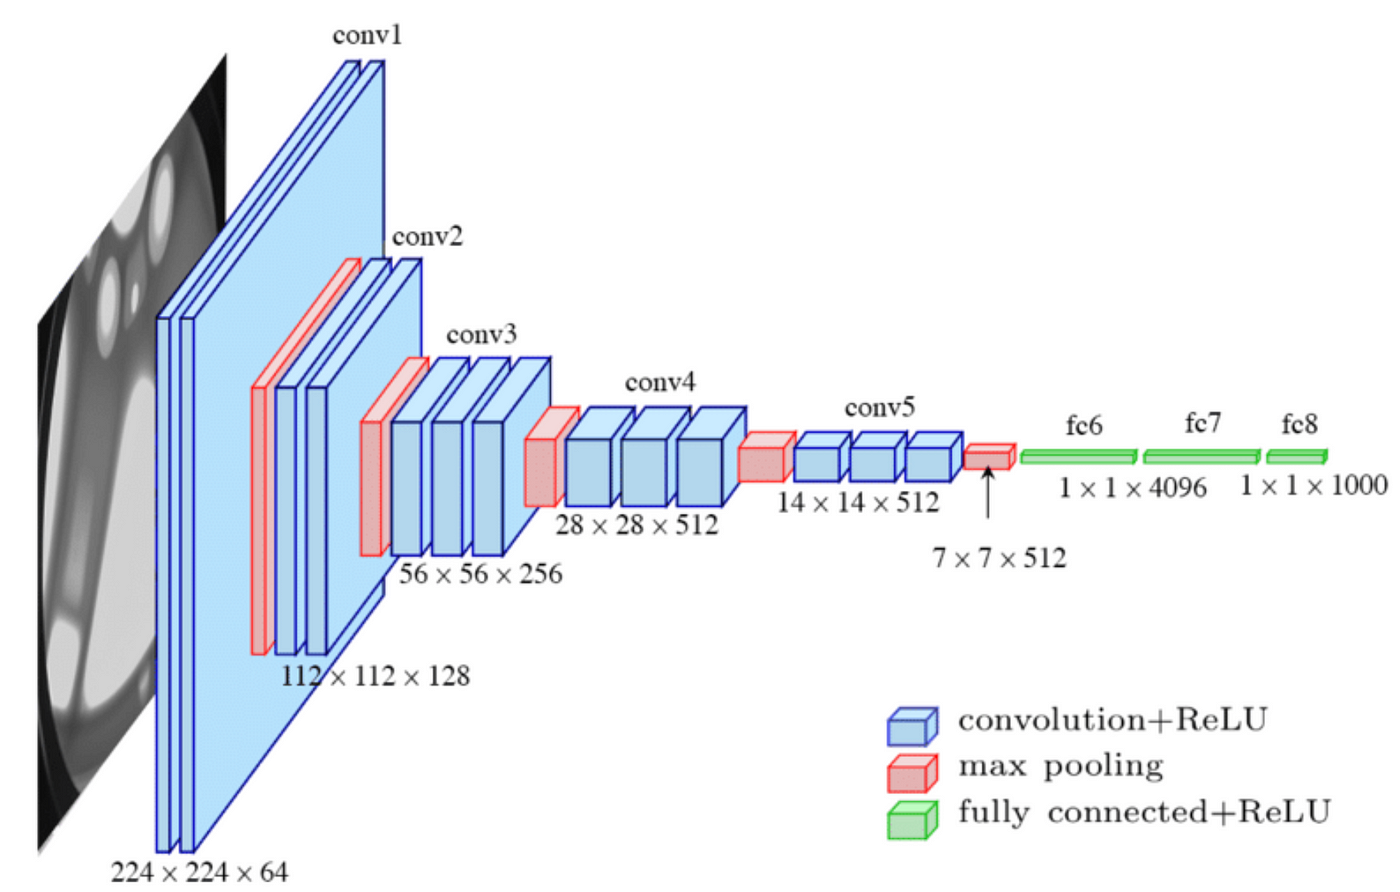

In [3]:
from torchvision.models import vgg16
from torchvision.models import VGG16_Weights

# load the VGG16 network *pre-trained* on the ImageNet dataset
weights = VGG16_Weights.DEFAULT
model = vgg16(weights=weights)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 82.2MB/s]


**Architecture** **of** **VGG16**

let us look at the model. It looks a lot like our convolutional model from the sign language exercise.


In [4]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**Input dimensions**

In [5]:
pre_trans = weights.transforms()
pre_trans

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

**Loading an Image**

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

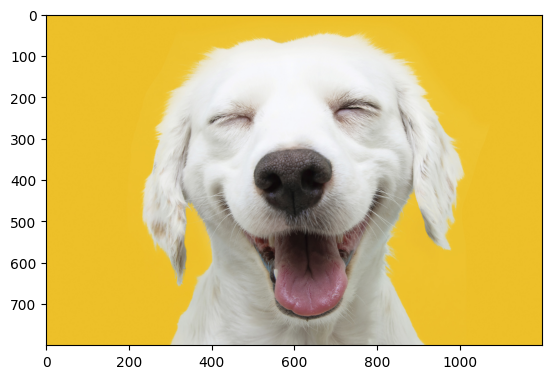

In [8]:
show_image("/content/smiling-dog.jpg")

**Preprocessing the Image**

Next, we will preprocess the image so that it is ready to be sent into the model. This is just like what we did in our last exercise when we predicted on the sign language images. Remember that in this case, the final shape of the image should be (1, 3, 224, 224). We will use the Transforms provided by `weights` to so this.

In [9]:
def load_and_process_image(file_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(file_path).shape)

    image = tv_io.read_image(file_path).to(device)
    image = pre_trans(image)  # weights.transforms()
    image = image.unsqueeze(0)  # Turn into a batch
    return image

processed_image = load_and_process_image("/content/smiling-dog.jpg")
print("Processed image shape: ", processed_image.shape)


Original image shape:  (800, 1200, 3)
Processed image shape:  torch.Size([1, 3, 224, 224])


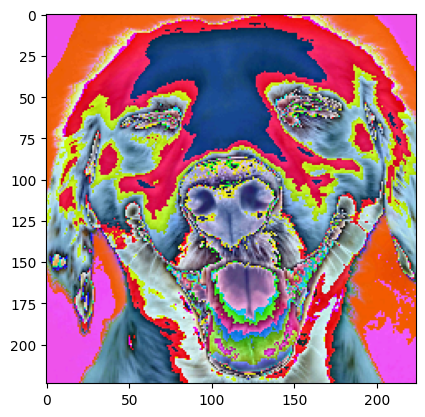

In [10]:
import torchvision.transforms.functional as F

plot_image = F.to_pil_image(torch.squeeze(processed_image))
plt.imshow(plot_image, cmap='gray')

That's a psychadelic effect, but if we squint our eyes, we can still see our happy dog. The strange coloring is due to the `Normalize` Transform, and the photo appears a little zoomed in because of `CenterCrop`.

**Predection**



Now that we have our image in the right format, we can pass it into our model and get a prediction. We are expecting an output of an array of 1000 elements, which is going to be difficult to read. We have a list of all the classes in json format, which is similar to a combination of python lists and dictionaries. In fact, let's load it into a combination of lists and dictionaries.


In [11]:
vgg_classes = json.load(open("/content/imagenet_class_index.json"))

In [12]:
vgg_classes["0"]

['n01440764', 'tench']

Let's create a function to make a prediction from the VGG model human readable. This is similar to our `predict_letter` function from the previous lesson. This time, we will use the [torch.topk](https://pytorch.org/docs/stable/generated/torch.topk.html) function to give us the top `3` predictions.

In [13]:
def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    output = model(image)[0]  # Unbatch
    predictions = torch.topk(output, 3)
    indices = predictions.indices.tolist()
    # Print predictions in readable form
    out_str = "Top results: "
    pred_classes = [vgg_classes[str(idx)][1] for idx in indices]
    out_str += ", ".join(pred_classes)
    print(out_str)

    return predictions

Original image shape:  (800, 1200, 3)
Top results: English_setter, kuvasz, golden_retriever


torch.return_types.topk(
values=tensor([13.8167, 13.6474, 13.3904], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([212, 222, 207], device='cuda:0'))

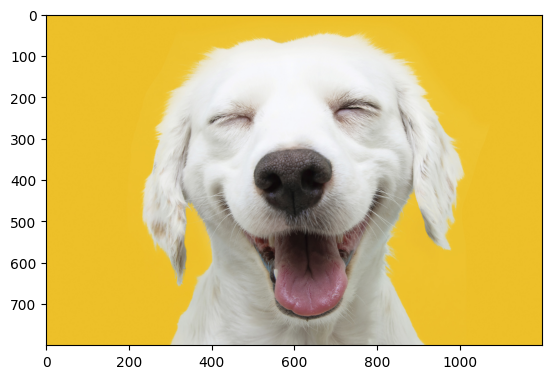

In [14]:
readable_prediction("/content/smiling-dog.jpg")

Original image shape:  (800, 1200, 3)
Top results: brown_bear, American_black_bear, sloth_bear


torch.return_types.topk(
values=tensor([33.7941, 25.4536, 21.7302], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([294, 295, 297], device='cuda:0'))

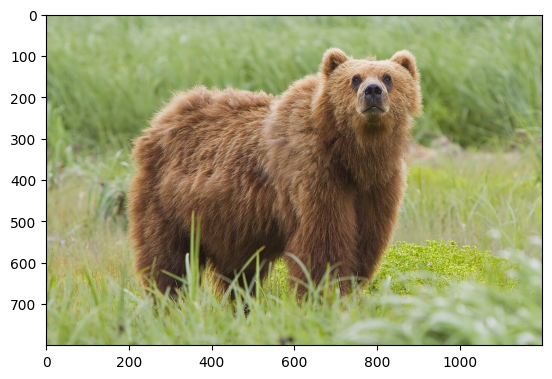

In [15]:
readable_prediction("/content/2010-kodiak-bear-1.jpg")

Original image shape:  (1800, 3200, 3)
Top results: tabby, Egyptian_cat, tiger_cat


torch.return_types.topk(
values=tensor([14.3105, 13.5772, 12.7252], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([281, 285, 282], device='cuda:0'))

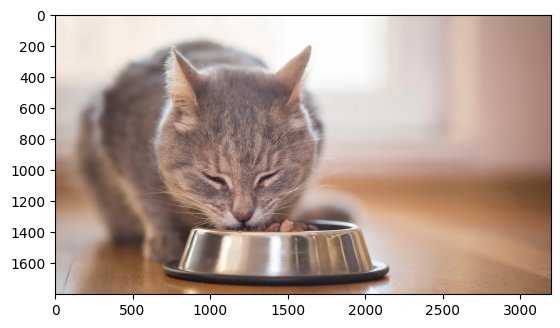

In [17]:
readable_prediction("/content/cat-eating-out-of-food-bowl.webp")

**Only Doggs**

Now that we are making predictions with our model, we can use our categories to only let dogs in and out and keep cats inside. The dogs are categories 151 through 268 and cats are categories 281 through 285.

In [20]:
def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    idx = model(image).argmax(dim=None).item()
    print("Predicted index:", idx)
    if 151 <= idx <= 268:
        print("Doggy come on in!")
    elif 281 <= idx <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

Original image shape:  (800, 1200, 3)
Predicted index: 294
You're not a dog! Stay outside!


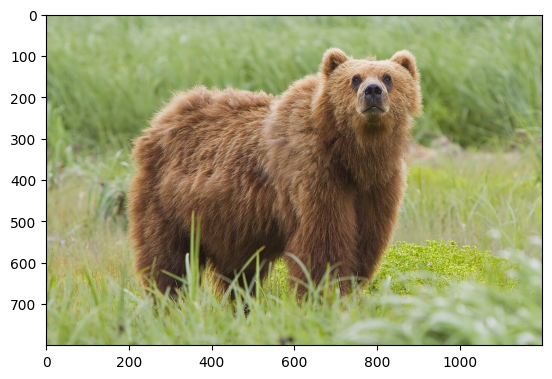

In [21]:
doggy_door("/content/2010-kodiak-bear-1.jpg")

Original image shape:  (800, 1200, 3)
Predicted index: 16
You're not a dog! Stay outside!


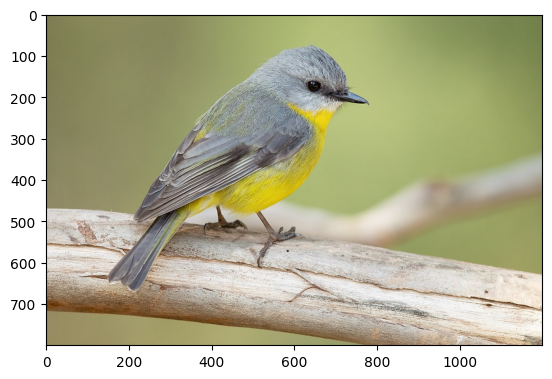

In [22]:
doggy_door("/content/Eopsaltria_australis_-_Mogo_Campground.jpg")

In [24]:
import imageio.v3 as iio

img = iio.imread("/content/mutt-mixed-breed-dog.avif")
iio.imwrite("/content/mutt-mixed-breed-dog.png", img)


Original image shape:  (981, 980, 3)
Predicted index: 207
Doggy come on in!


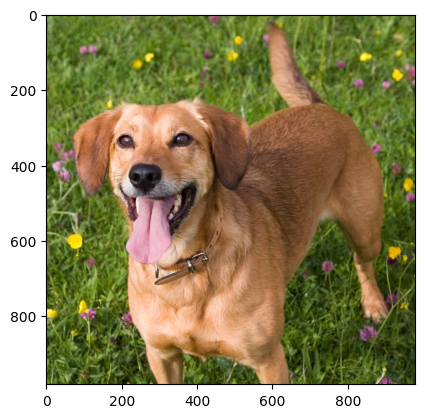

In [25]:
doggy_door("/content/mutt-mixed-breed-dog.png")

Original image shape:  (600, 800, 3)
Predicted index: 162
Doggy come on in!


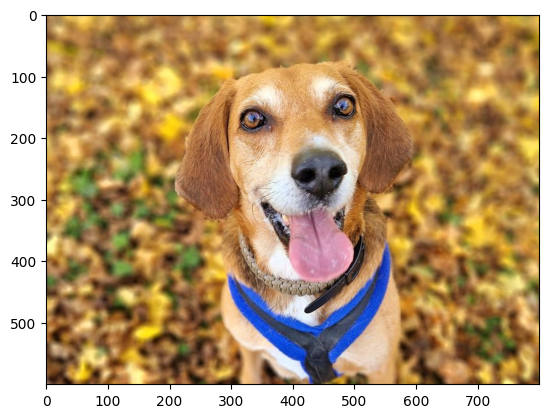

In [26]:
doggy_door("/content/toffee 2.jpg")

Original image shape:  (770, 1200, 3)
Predicted index: 235
Doggy come on in!


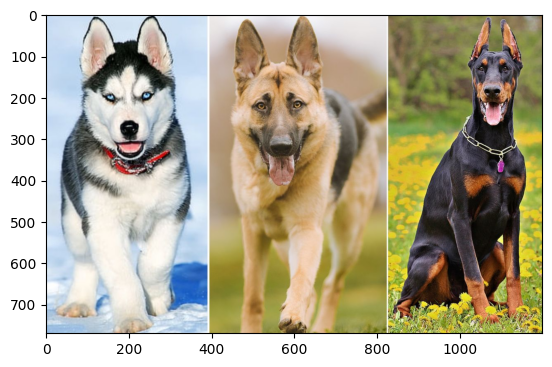

In [27]:
doggy_door("/content/Most-Popular-Dog-Breeds-1-1.jpg")